In [189]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/project/Project data/loan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               237 non-null    int64
 1   Dependents        237 non-null    int64
 2   Education         237 non-null    int64
 3   Income            237 non-null    int64
 4   LoanAmount        237 non-null    int64
 5   Loan_Amount_Term  237 non-null    int64
 6   Credit_History    237 non-null    int64
 7   Property_Area     237 non-null    int64
 8   Loan_Status       237 non-null    int64
dtypes: int64(9)
memory usage: 16.8 KB


In [190]:
df.describe()

,Age,Dependents,Education,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.936709,0.755274,1.797468,1.632911,2.683544,2.843882,0.763713,1.915612,0.506329
std,0.244001,0.430834,0.402737,0.692157,0.557179,0.465885,0.425699,0.798070,0.501018
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,1.000000,3.000000,1.000000


In [191]:
df['Loan_Status'].value_counts()

1    120
0    117
Name: Loan_Status, dtype: int64

In [192]:
df.columns

Index(['Age', 'Dependents', 'Education', 'Income', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [193]:
df.head()

,Age,Dependents,Education,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,2,2,3,3,1,1,1
1,1,1,1,1,2,3,1,3,0
2,1,0,2,2,3,3,0,2,0
3,1,0,2,2,3,3,1,3,1
4,1,1,2,3,3,3,1,2,1


In [194]:
# X for column 1 to last column-1, y for last column
from sklearn.model_selection import train_test_split
X=df.drop(columns = 'Loan_Status')
y=df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [195]:
#@title Default title text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=50, scoring='accuracy')
grid_search.fit(X_train, y_train)

# find the best hyperparameters 
for k in param_grid['n_neighbors']:
    print("Hyperparameters for k =", k, ":")
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print("\n")

Hyperparameters for k = 1 :
Best Hyperparameters: {'n_neighbors': 1}
Best Score: 0.9466666666666665


Hyperparameters for k = 3 :
Best Hyperparameters: {'n_neighbors': 1}
Best Score: 0.9466666666666665


Hyperparameters for k = 5 :
Best Hyperparameters: {'n_neighbors': 1}
Best Score: 0.9466666666666665


Hyperparameters for k = 7 :
Best Hyperparameters: {'n_neighbors': 1}
Best Score: 0.9466666666666665


Hyperparameters for k = 9 :
Best Hyperparameters: {'n_neighbors': 1}
Best Score: 0.9466666666666665




In [196]:
## Using piepline to implement k-nn classifier ##
#--------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
steps = [('scaler', StandardScaler()),
('knn', KNeighborsClassifier(n_neighbors = 1))]
knn_pipelineK = Pipeline(steps)
knn_pipelineK.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [197]:
##k-nn classifier for Training data ##
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
ypred_train = knn_pipelineK.predict(X_train)
matT_clf = confusion_matrix(y_train, ypred_train)
reportT_clf = classification_report(y_train, ypred_train)
print(matT_clf)
print(reportT_clf)
ypred_trainP = knn_pipelineK.predict_proba(X_train)
aucT = roc_auc_score(y_train, ypred_trainP[:,1])
print(aucT)

[[78  0]
 [ 0 87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        87

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

1.0


In [141]:
## k-nn classifier for Testing data ##
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
ypred_test = knn_pipelineK.predict(X_test)
matS_clf = confusion_matrix(y_test, ypred_test)
reportS_clf = classification_report(y_test, ypred_test)
print(matS_clf)
print(reportS_clf)
ypred_testP = knn_pipelineK.predict_proba(X_test)
aucS = roc_auc_score(y_test, ypred_testP[:,1])
print(aucS)

[[33  6]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.83      0.91      0.87        33

    accuracy                           0.88        72
   macro avg       0.88      0.88      0.87        72
weighted avg       0.88      0.88      0.88        72

0.8776223776223776


In [142]:
### For KNN Result ###
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
recallT= recall_score(y_train, ypred_train)
precisionT= precision_score(y_train, ypred_train)

recallS= recall_score(y_test, ypred_test)
precisionS= precision_score(y_test, ypred_test)
KNN = pd.DataFrame({'KNN Precision': [precisionT, precisionS],
                       'KNN Recall': [recallT, recallS],
                       'KNN Accuracy': [aucT, aucS]})
KNN.index= ['Training', 'Testing']
KNN

,KNN Precision,KNN Recall,KNN Accuracy
Training,1.000000,1.000000,1.000000
Testing,0.833333,0.909091,0.877622


In [143]:
## Using piepline to implement Logistic regression ##
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),
('logReg', LogisticRegression())]
clf_pipelineL = Pipeline(steps)
clf_pipelineL.fit(X_train, y_train)
#--------------------------------------------------
## Logistic regression for Training data##
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
ypred_train = clf_pipelineL.predict(X_train)
matT_clf = confusion_matrix(y_train, ypred_train)
reportT_clf = classification_report(y_train, ypred_train)
lopred_trainP = clf_pipelineL.predict_proba(X_train)
aucT = roc_auc_score(y_train, lopred_trainP[:,1])
print(matT_clf)
print(reportT_clf)
print(aucT)

[[78  0]
 [ 0 87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        87

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

1.0


In [144]:
## Logistic regression for Testing data##
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
ypred_test = clf_pipelineL.predict(X_test)
matS_clf = confusion_matrix(y_test, ypred_test)
reportS_clf = classification_report(y_test, ypred_test)
lopred_testP = clf_pipelineL.predict_proba(X_test)
aucS = roc_auc_score(y_test, lopred_testP[:,1])
print(matS_clf)
print(reportS_clf)
print(aucS)

[[37  2]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.94      1.00      0.97        33

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72

0.9992229992229992


In [163]:
### For Logistic Regression Result ###
recallT= recall_score(y_train, ypred_train)
precisionT= precision_score(y_train, ypred_train)

recallS= recall_score(y_test, ypred_test)
precisionS= precision_score(y_test, ypred_test)
Logistic = pd.DataFrame({'Logistic Precision': [precisionT, precisionS],
                       'Logistic Recall': [recallT, recallS],
                       'Logistic Accuracy': [aucT, aucS]})
Logistic.index= ['Training', 'Testing']
Logistic

,Logistic Precision,Logistic Recall,Logistic Accuracy
Training,1.000000,1.0,1.000000
Testing,0.942857,1.0,0.999223


In [164]:
X_test

,Age,Dependents,Education,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
201,1,1,2,1,2,3,1,1
130,1,1,2,2,3,3,1,2
88,1,1,2,1,2,3,0,3
95,1,1,1,1,3,2,1,3
211,1,0,1,1,3,3,1,1
...,...,...,...,...,...,...,...,...
223,1,1,2,2,3,3,1,3
164,1,1,1,2,3,3,1,1
112,1,1,2,1,3,1,1,2
168,1,1,2,3,2,3,1,2


In [167]:
## Linear Kernel  ---------------
from sklearn.svm import SVC
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'linear',
                     class_weight='balanced', probability=True))]

svcK_pipeline = Pipeline(steps)
svcK_pipeline.fit(X_train, y_train)
#--------------------------------------------------
## Linear Kernel for Training data
svcKypred_train = svcK_pipeline.predict(X_train)
svcKmat_clf = confusion_matrix(y_train, svcKypred_train)
svcKreport_clf = classification_report(y_train, svcKypred_train)
svcKpred_trainP = svcK_pipeline.predict_proba(X_train)
aucT = roc_auc_score(y_train, svcKpred_trainP[:,1])
print(svcKmat_clf)
print(svcKreport_clf)
print(aucT)

[[78  0]
 [ 0 87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        87

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

1.0


In [168]:
## Linear Kernel for Testing data
svcKypred_test = svcK_pipeline.predict(X_test)
svcKmat_clf = confusion_matrix(y_test, svcKypred_test)
svcKreport_clf = classification_report(y_test, svcKypred_test)
svcKpred_testP = svcK_pipeline.predict_proba(X_test)
aucS = roc_auc_score(y_test, svcKpred_testP[:,1])
print(svcKmat_clf)
print(svcKreport_clf)
print(aucS)

[[39  0]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        33

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

1.0


In [172]:
### For Linear Kernel Result ###
recallT= recall_score(y_train, svcKypred_train)
precisionT= precision_score(y_train, svcKypred_train)

recallS= recall_score(y_test, svcKypred_test)
precisionS= precision_score(y_test, svcKypred_test)
LiKernel = pd.DataFrame({'LiKernel Precision': [precisionT, precisionS],
                       'LiKernel Recall': [recallT, recallS],
                       'LiKernel Accuracy': [aucT, aucS]})
LiKernel.index= ['Training', 'Testing']
LiKernel

,LiKernel Precision,LiKernel Recall,LiKernel Accuracy
Training,1.0,1.0,1.0
Testing,1.0,1.0,1.0


In [179]:
## Poly Kernel  ---------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'poly', degree= 3,
                     class_weight='balanced', probability=True))]

svcP_pipeline = Pipeline(steps)
svcP_pipeline.fit(X_train, y_train)
#--------------------------------------------------
## Poly Kernel for Training dat
svcPypred_train = svcP_pipeline.predict(X_train)
svcPmat_clf = confusion_matrix(y_train, svcPypred_train)
svcPreport_clf = classification_report(y_train, svcPypred_train)
svcP_trainP = svcP_pipeline.predict_proba(X_train)
aucT = roc_auc_score(y_train, svcP_trainP[:,1])
print(svcPmat_clf)
print(svcPreport_clf)
print(aucT)

[[65 13]
 [ 0 87]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        78
           1       0.87      1.00      0.93        87

    accuracy                           0.92       165
   macro avg       0.94      0.92      0.92       165
weighted avg       0.93      0.92      0.92       165

0.9964633068081344


In [180]:
## Poly Kernel for Testing data
svcPypred_test = svcP_pipeline.predict(X_test)
svcPmat_clf = confusion_matrix(y_test, svcPypred_test)
svcPreport_clf = classification_report(y_test, svcPypred_test)
svcPpred_testP = svcP_pipeline.predict_proba(X_test)
aucS = roc_auc_score(y_test, svcPpred_testP[:,1])
print(svcPmat_clf)
print(svcPreport_clf)
print(aucS)

[[29 10]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83        39
           1       0.76      0.94      0.84        33

    accuracy                           0.83        72
   macro avg       0.85      0.84      0.83        72
weighted avg       0.85      0.83      0.83        72

0.9494949494949495


In [182]:
recallT= recall_score(y_train, svcPypred_train)
precisionT= precision_score(y_train, svcPypred_train)

recallS= recall_score(y_test, svcPypred_test)
precisionS= precision_score(y_test, svcPypred_test)
PoKernel = pd.DataFrame({'PoKernel Precision': [precisionT, precisionS],
                       'PoKernel Recall': [recallT, recallS],
                       'PoKernel Accuracy': [aucT, aucS]})
PoKernel.index= ['Training', 'Testing']
PoKernel

,PoKernel Precision,PoKernel Recall,PoKernel Accuracy
Training,0.870000,1.000000,0.996463
Testing,0.756098,0.939394,0.949495


In [183]:
## Gaussian  ---------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'rbf', gamma= 'scale',
                     class_weight='balanced'))]

svcG_pipeline = Pipeline(steps)
svcG_pipeline.fit(X_train, y_train)
#--------------------------------------------------
## Gaussian for Training data
svcGypred_train = svcG_pipeline.predict(X_train)
svcGmat_clf = confusion_matrix(y_train, svcGypred_train)
svcGreport_clf = classification_report(y_train, svcGypred_train)
svcG_trainP = svcP_pipeline.predict_proba(X_train)
aucT = roc_auc_score(y_train, svcG_trainP[:,1])
print(svcGmat_clf)
print(svcGreport_clf)
print(aucT)

[[78  0]
 [ 1 86]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.99      0.99        87

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165

0.9964633068081344


In [184]:
## Gaussian for Testing data
svcGypred_test = svcG_pipeline.predict(X_test)
svcGmat_clf = confusion_matrix(y_test, svcGypred_test)
svcGreport_clf = classification_report(y_test, svcGypred_test)
svcG_trainP = svcP_pipeline.predict_proba(X_train)
astype_td64_unit_conversion = roc_auc_score(y_train, svcG_trainP[:,1])
print(svcGmat_clf)
print(svcGreport_clf)
print(aucS)

[[34  5]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        39
           1       0.87      1.00      0.93        33

    accuracy                           0.93        72
   macro avg       0.93      0.94      0.93        72
weighted avg       0.94      0.93      0.93        72

0.9494949494949495


In [185]:
recallT= recall_score(y_train, svcGypred_train)
precisionT= precision_score(y_train, svcGypred_train)

recallS= recall_score(y_test, svcGypred_test)
precisionS= precision_score(y_test, svcGypred_test)
PoKernel = pd.DataFrame({'PoKernel Precision': [precisionT, precisionS],
                       'PoKernel Recall': [recallT, recallS],
                       'PoKernel Accuracy': [aucT, aucS]})
PoKernel.index= ['Training', 'Testing']
PoKernel

,PoKernel Precision,PoKernel Recall,PoKernel Accuracy
Training,1.000000,0.988506,0.996463
Testing,0.868421,1.000000,0.949495


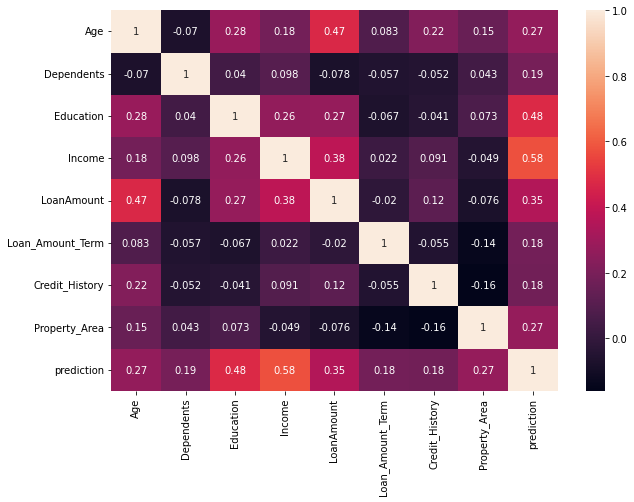

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
result = pd.DataFrame(X_test)
result['prediction'] = ypred_test
corr = result.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);